<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-1/blob/main/YB_WEEK5_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH.4 분류

### 01. 분류의 개요

- 분류: 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

- 앙상블은 일반적으로 배깅과 부스팅 방식으로 나누어진다.

- 배깅 방식의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 이용하는 알고리즘이다.

- 최근, 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있다.

> XgBoost(eXtra Gradient Boost)와 LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡았다.

- 앙상블은 대부분 동일한 알고리즘을 결합하며, 기본 알고리즘으로는 일반적으로 결정 트리를 사용한다.


### 02. 결정 트리

- 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

<결정 트리의 구조>

- 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값이다.

- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

- 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)
지수와 지니 계수가 있다.

> 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.

<결정 트리 모델의 특징>

- 정보의 균일도만 신경 쓰면 되므로 특별한
경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다는 장점이 있다.

- 결정 트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점이다.

> 이를 극복하기 위해, 트리의 크기를 사전에 제한하는 튜닝이 필요하다.



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [11]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

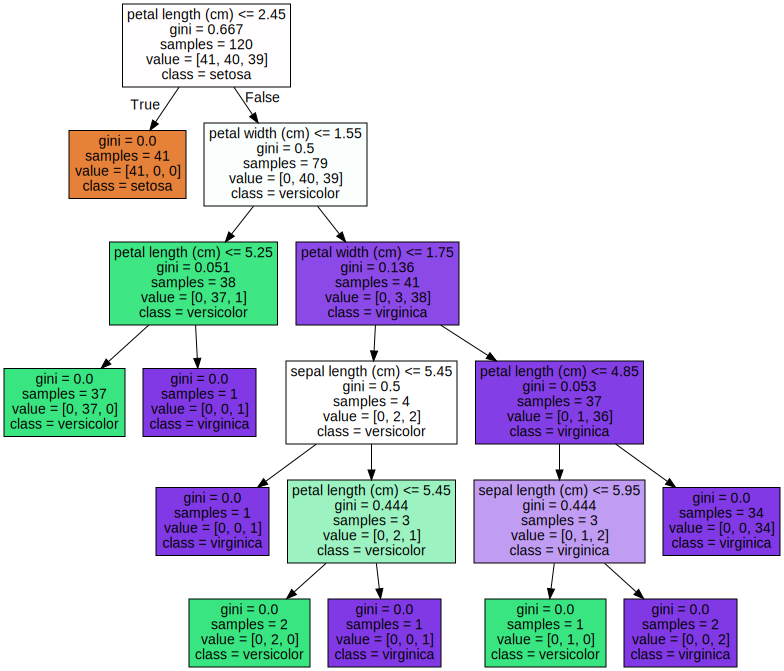

In [12]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

▶ 더 이상 자식 노드가 없는 노드는 리프 노드이다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드이다. 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다.

In [13]:
# DecisionTree Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [14]:
# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot2", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

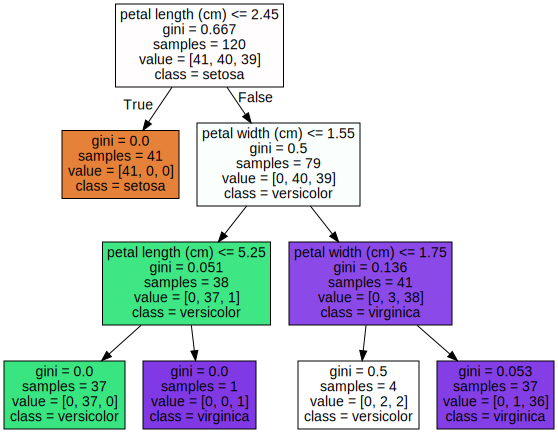

In [15]:
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot2") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

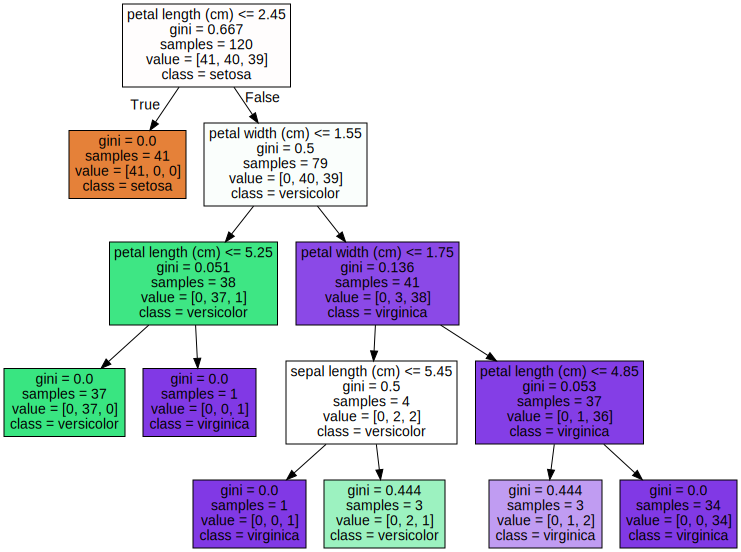

In [16]:
# DecisionTree Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot3", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot3") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)



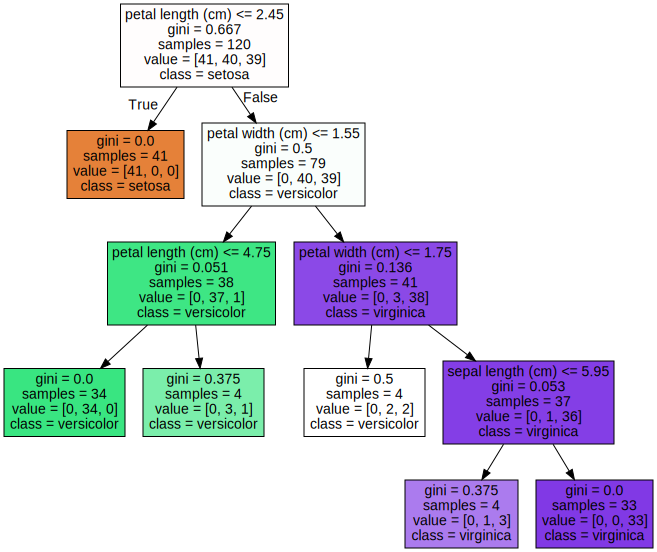

In [17]:
# DecisionTree Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot4", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot4") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance:
[0.006 0.    0.546 0.448]
sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


<Axes: >

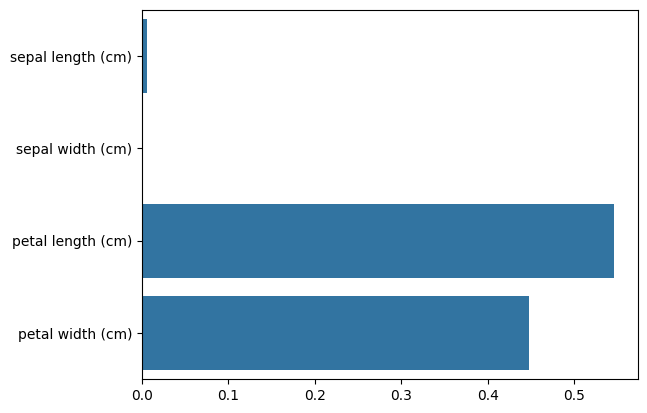

In [20]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance  추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

(100, 2)
(100,)


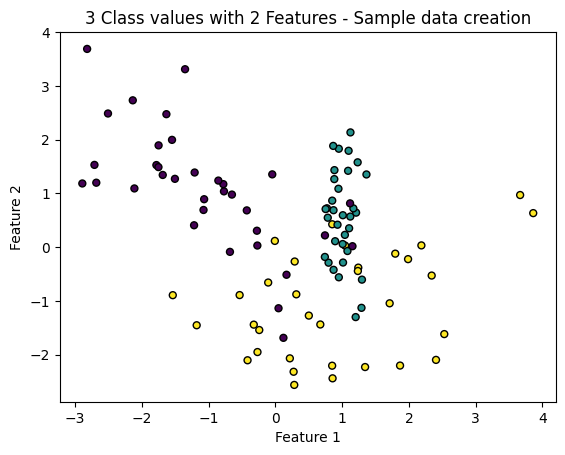

In [27]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 데이터 생성: 100개의 샘플, 2개의 피처, 3개의 클래스
X_features, y_labels = make_classification(n_samples=100,
                                           n_features=2,
                                           n_informative=2,
                                           n_redundant=0,
                                           n_classes=3,
                                           n_clusters_per_class=1,
                                           random_state=0)

# 확인
print(X_features.shape)  # (100, 2)
print(y_labels.shape)    # (100,)

# 시각화
plt.title("3 Class values with 2 Features - Sample data creation")
plt.scatter(X_features[:, 0], X_features[:, 1],
            c=y_labels, marker='o', s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


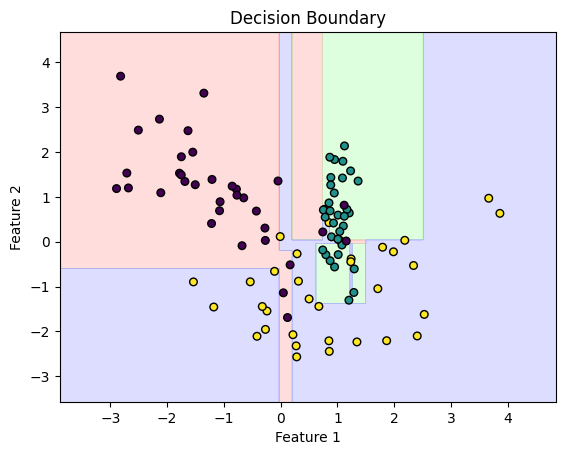

In [30]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    h = 0.02  # 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 모델 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 배경 영역 색칠 (결정 경계)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

    # 실제 데이터 산점도
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

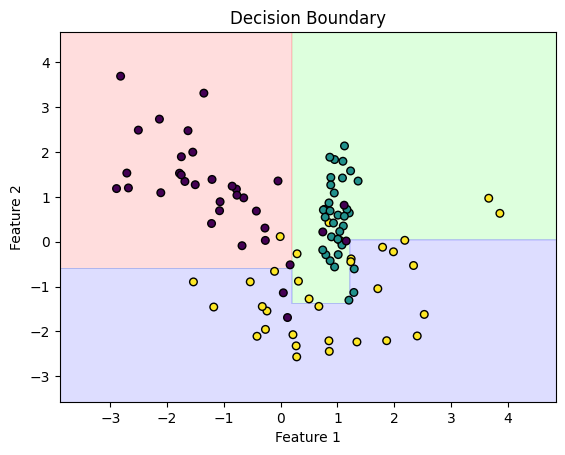

In [31]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [32]:
from google.colab import files

uploaded = files.upload()

Saving features.txt to features.txt


In [36]:
import pandas as pd

# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [37]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [47]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [40]:
from google.colab import files

uploaded = files.upload()

Saving X_test.txt to X_test.txt
Saving X_train.txt to X_train.txt
Saving y_test.txt to y_test.txt
Saving y_train.txt to y_train.txt


In [51]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분류되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df = pd.read_csv('./features.txt',sep='\s+',header=None,names=['column_index','column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환.
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피쳐 데이터세트와 테스트 피쳐 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용.
  X_train = pd.read_csv('./X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('./X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여.
  y_train = pd.read_csv('./y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('./y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [53]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [55]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'. format (accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [59]:
from sklearn.model_selection import GridSearchCV

params = {
 'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24],
 'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [60]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [61]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [63]:
 params = {
 'max_depth' : [ 8, 12, 16, 20],
 'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [65]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


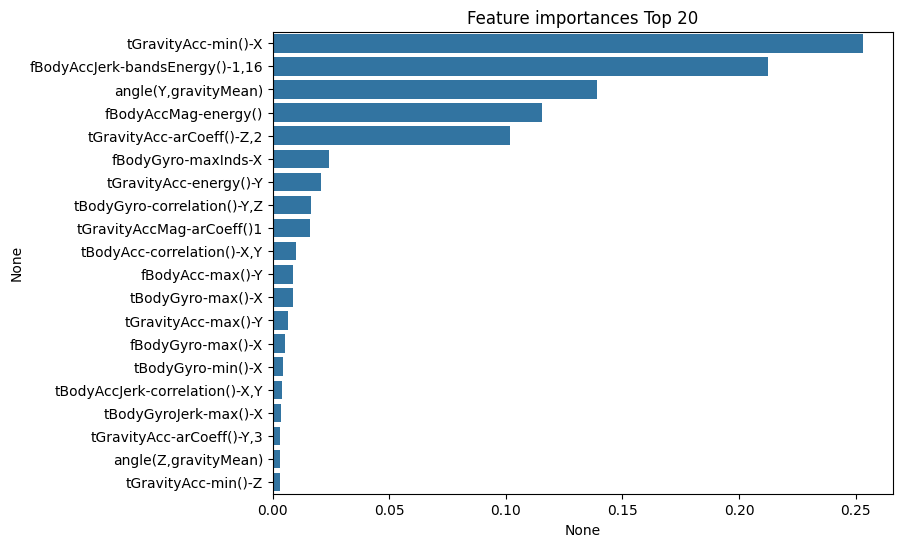

In [67]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()